#### Implement a Kalman filter to fit a 1D dataset

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
class kalman_filter:
    def __init__(self, true_val, init_est, init_est_err):
        '''Initialize the filter
        '''
        self.true_val = true_val
        
        self.init_est = init_est
        self.init_est_err = init_est_err
        
        self.measures_lst = []
        self.estimates_lst = []
        self.true_lst = []
        
        self.measurement_errors = []
        self.estimate_errors = []
        self.kalman_gains = []
    
    def get_kalman_gain(self, est_error, meas_error):
        return est_error / (est_error + meas_error)
    
    def update_estimate(self, prev_est, gain, measurement):
        return prev_est + (gain*(measurement - prev_est))
    
    def update_estimate_error(self, prev_est_error, gain):
        return prev_est_error*(1 - gain)
    
    def iterate(self, measures, measure_errors):

        cur_est = self.init_est
        cur_est_err = self.init_est_err                
        
        for cur_meas, cur_meas_error in zip(measures, measure_errors):
            gain = self.get_kalman_gain(cur_est_err, cur_meas_error)
            cur_est = self.update_estimate(cur_est, gain, cur_meas)
            cur_est_err = self.update_estimate_error(cur_est_err, gain)
            
            self.measures_lst.append(cur_meas)
            self.estimates_lst.append(cur_est)
            self.true_lst.append(self.true_val)
            
            self.measurement_errors.append(cur_meas_error)
            self.estimate_errors.append(cur_est_err)
            self.kalman_gains.append(gain)
            
        return cur_est
    
    
    def plot_filter(self):
        x = [i for i in range(len(measures))]
    
        plt.plot(x, self.measures_lst)
        plt.plot(x, self.estimates_lst)
        plt.plot(x, self.true_lst)

        plt.legend(['measurements', 'estimates', 'ground_truth'])
        plt.show()
        
        plt.plot(x, self.kalman_gains)
        #plt.plot(x, self.measurement_errors)
        plt.plot(x, self.estimate_errors)

        plt.legend(['gains', 'estimate errors'])
        plt.show()        

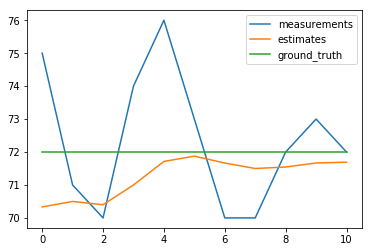

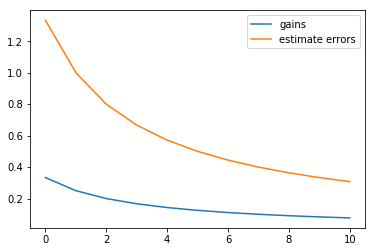

In [58]:
measures = [75, 71, 70, 74, 76, 73, 70, 70, 72, 73, 72]
measure_errors = [4, 4, 4, 4, 4, 4 ,4, 4, 4, 4, 4, 4]

kf = kalman_filter(72, 68, 2)
kf.iterate(measures, measure_errors)

kf.plot_filter()

<ul> <li> In plot 1, the filter seems to converge onto the ground truth. </li> <li> In plot 2, the direct correlation between gains and estimation errors can be observed. Initially, the gains are large, which implies estimation erros are large too. As erros decrease, the gains start decreasing too </li> </ul>